<function matplotlib.pyplot.show(close=None, block=None)>

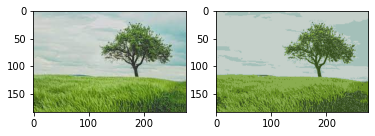

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sys

# read the image
image = cv2.imread("new.jpg")

# convert to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values = image.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)

# define stopping criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# number of clusters (K)
k =6
compactness, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# convert back to 8 bit values
centers = np.uint8(centers)

# flatten the labels array
labels = labels.flatten()

# convert all pixels to the color of the centroids
segmented_image = centers[labels]

# reshape back to the original image dimension
segmented_image = segmented_image.reshape(image.shape)

# show the image
plt.subplot(1, 2, 1), plt.imshow(image),
plt.subplot(1, 2, 2),plt.imshow(segmented_image)
plt.show



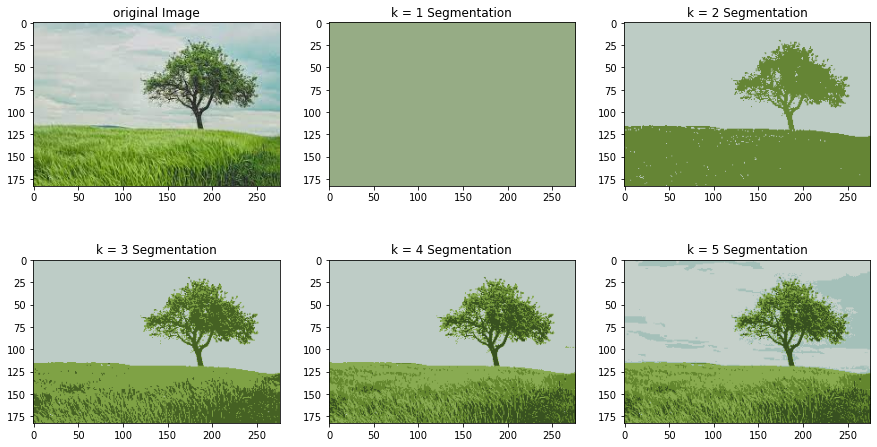

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# read the image
image = cv2.imread("new.jpg")

# convert to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values = image.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)

# define stopping criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 200, 0.2)

# try different values of k
k_values = [1, 2, 3, 4, 5]

# display segmented images for different k values
plt.figure(figsize=(15, 8))

for i, k in enumerate(k_values, 2):
    # apply k-means clustering
    compactness, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # convert back to 8 bit values
    centers = np.uint8(centers)

    # flatten the labels array
    labels = labels.flatten()

    # convert all pixels to the color of the centroids
    segmented_image = centers[labels]

    # reshape back to the original image dimension
    segmented_image = segmented_image.reshape(image.shape)

    # display the images
    plt.subplot(2, 3, 1), plt.imshow(image), plt.title('original Image')
    plt.subplot(2, 3, i), plt.imshow(segmented_image)
    plt.title(f'k = {k} Segmentation')

plt.show()


(50508, 3)
(10, 3)
(50508, 3)
(1, 3)
(50508, 3)
(2, 3)
(50508, 3)
(3, 3)
(50508, 3)
(4, 3)
(50508, 3)
(5, 3)


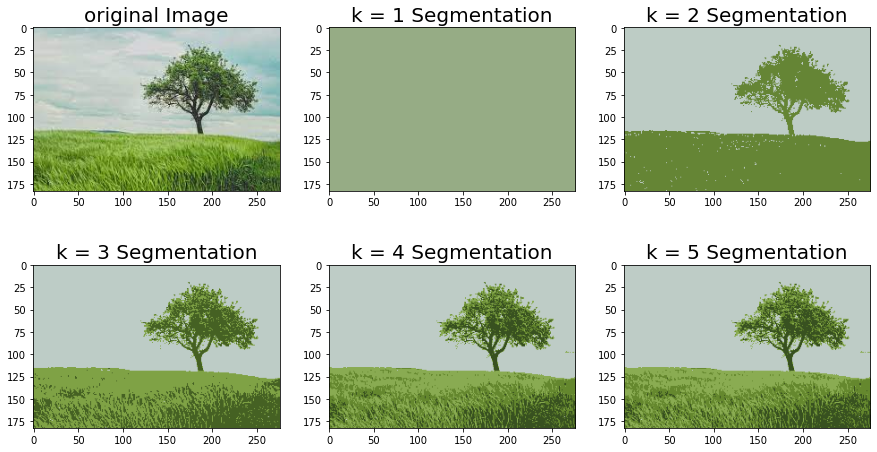

In [7]:
#K means Assignment
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
def k_means_clustering(image, k, max_iterations=100):
    # Reshape the image to a 2D array of pixels
    pixels = image.reshape((-1, 3)).astype(np.float32)
    print(pixels.shape)

    # Randomly initialize k cluster centers
    centers = np.random.randint(0, 256, (k, 3)).astype(np.float32) # k is the number of rows and 3 is the number of cols
    print(centers.shape)

    for _ in range(max_iterations):
        # Calculate distances from each pixel to each cluster center
        distances = cdist(pixels, centers ,'euclidean')

        # Assign each pixel to the cluster with the closest center
        labels = np.argmin(distances, axis=1)# Update the cluster centers based on the mean of pixels in each cluster
        for i in range(k):
            cluster_pixels = pixels[labels == i]
            if len(cluster_pixels) > 0:
                centers[i] = np.mean(cluster_pixels, axis=0)

    # Reshape the labels to the shape of the original image
    segmented_image = centers[labels].reshape(image.shape).astype(np.uint8)

    return segmented_image

# Load an example image
image_path = 'new.jpg'
image = cv2.imread(image_path)

# Convert BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Perform k-means clustering with k=4 (you can adjust this value)

segmented_image = k_means_clustering(image_rgb, k_value)

k_values = [1, 2, 3, 4, 5]

# display segmented images for different k values
plt.figure(figsize=(15, 8))

for i, k in enumerate(k_values, 2):
    # apply k-means clustering
    segmented_image = k_means_clustering(image_rgb, k)

    # display the images
    plt.subplot(2, 3, 1), plt.imshow(image_rgb), plt.title('original Image',fontsize = 20)
    plt.subplot(2, 3, i), plt.imshow(segmented_image)
    plt.title(f'k = {k} Segmentation',fontsize = 20)

plt.show()

